In [1]:
#Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC

In [3]:
#creating classifiers
lr = LinearRegression()
svc= LinearSVC(C= 1.0)
rfc= RandomForestClassifier(n_estimators=100)

In [4]:
wht = pd.read_excel('D:/Thesis_proj_excels/Arrest_neighbourhood.xlsx')

In [5]:
wht.shape


(78595, 17)

In [6]:
print(wht.keys())

Index(['Arrest', 'Age', 'Sex', 'Race', 'ArrestDate', 'ArrestTime',
       'ArrestLocation', 'IncidentOffense', 'IncidentLocation', 'Charge',
       'ChargeDescription', 'District', 'Post', 'Neighborhood', 'Location 1',
       'Latitude', 'Longitude'],
      dtype='object')


In [7]:
abc = wht['Neighborhood'].value_counts()

In [8]:
abc.to_csv('D:/Thesis_proj_excels/incident_neighbourhood_count.csv')

C:\Users\tawde\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [9]:
wht['Neighborhood'] = wht['Neighborhood'].str.upper() 

In [10]:
abc = wht['Neighborhood'].value_counts()

In [18]:
abc.to_csv('D:/Thesis_proj_excels/incident_neighbourhood_count2.csv')

C:\Users\tawde\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [48]:
actual = pd.read_excel('D:/Thesis_proj_excels/Linear_Regression_input.xlsx')

In [49]:
ldip = pd.read_excel('D:/All_details/lessthandiploma.xlsx')

In [50]:
actual['less than diploma'] = ldip['Less than Diploma'].values


In [51]:
print(actual.keys())

Index([' OBJECTID ', 'Total Arrests', 'Unemployment Rate (2008-2012)',
       ' Total Male Population (2010) ', ' Total Female Population (2010) ',
       ' Percent of Residents - Black/African-American ',
       ' Percent of Residents - White/Caucasian ',
       ' Percent of Residents - Asian ',
       ' Percent of Residents - Two or More Races ',
       ' Percent of Residents - All Other Races ',
       ' Percent of Residents - Hispanic ', ' Racial Diversity Index ',
       ' Percent of Population Under 5 Years ',
       ' Percent of Population 5-17 Years Old ',
       ' Percent of Population 18-24 Years Old ',
       ' Percent of Population 25-64 Years Old ',
       ' Percent of Population 65 Years and Older ',
       ' Total Number of Households (2010) ',
       ' Percent of Female-Headed Households with Children Under 18 ',
       ' Percent of Households with Children Under 18 ',
       ' Average Household Size ', ' Median Household Income ',
       ' Percent of Households Earning

In [52]:
actual.columns.values.tolist()

['\xa0OBJECTID\xa0',
 'Total Arrests',
 'Unemployment Rate (2008-2012)',
 '\xa0Total Male Population (2010)\xa0',
 '\xa0Total Female Population (2010)\xa0',
 '\xa0Percent of Residents - Black/African-American\xa0',
 '\xa0Percent of Residents - White/Caucasian\xa0',
 '\xa0Percent of Residents - Asian\xa0',
 '\xa0Percent of Residents - Two or More Races\xa0',
 '\xa0Percent of Residents - All Other Races\xa0',
 '\xa0Percent of Residents - Hispanic\xa0',
 '\xa0Racial Diversity Index\xa0',
 '\xa0Percent of Population Under 5 Years\xa0',
 '\xa0Percent of Population 5-17 Years Old\xa0',
 '\xa0Percent of Population 18-24 Years Old\xa0',
 '\xa0Percent of Population 25-64 Years Old\xa0',
 '\xa0Percent of Population 65 Years and Older\xa0',
 '\xa0Total Number of Households (2010)\xa0',
 '\xa0Percent of Female-Headed Households with Children Under 18\xa0',
 '\xa0Percent of Households with Children Under 18\xa0',
 '\xa0Average Household Size\xa0',
 '\xa0Median Household Income\xa0',
 '\xa0Percent o

In [18]:
actual.isnull().sum()

 OBJECTID                                                       0
Total Arrests                                                   0
Unemployment Rate (2008-2012)                                   0
 Total Male Population (2010)                                   0
 Total Female Population (2010)                                 0
 Percent of Residents - Black/African-American                  0
 Percent of Residents - White/Caucasian                         0
 Percent of Residents - Asian                                   0
 Percent of Residents - Two or More Races                       0
 Percent of Residents - All Other Races                         0
 Percent of Residents - Hispanic                                0
 Racial Diversity Index                                         0
 Percent of Population Under 5 Years                            0
 Percent of Population 5-17 Years Old                           0
 Percent of Population 18-24 Years Old                          0
 Percent o

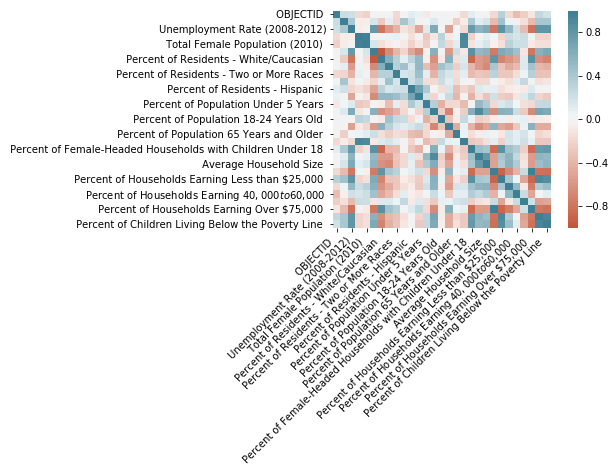

In [26]:
#Heatmap to understand corelation and causation between variables
corr = actual.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [61]:
corr_matrix = actual.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [38]:
sol

 Median Household Income                                       Percent of Households Earning Over $75,000                     0.978357
 Percent of Residents - Black/African-American                 Percent of Residents - White/Caucasian                         0.974959
 Total Male Population (2010)                                  Total Female Population (2010)                                 0.969894
 Percent of Family Households Living Below the Poverty Line    Percent of Children Living Below the Poverty Line              0.936468
 Total Male Population (2010)                                  Total Number of Households (2010)                              0.932429
 Percent of Households Earning Less than $25,000               Percent of Family Households Living Below the Poverty Line     0.924922
 Total Female Population (2010)                                Total Number of Households (2010)                              0.905969
 Percent of Population 5-17 Years Old                  

In [19]:
actual

,OBJECTID,Total Arrests,Unemployment Rate (2008-2012),Total Male Population (2010),Total Female Population (2010),Percent of Residents - Black/African-American,Percent of Residents - White/Caucasian,Percent of Residents - Asian,Percent of Residents - Two or More Races,Percent of Residents - All Other Races,...,Average Household Size,Median Household Income,"Percent of Households Earning Less than $25,000","Percent of Households Earing $25,000 to $40,000","Percent of Households Earning $40,000 to $60,000","Percent of Households Earning $60,000 to $75,000","Percent of Households Earning Over $75,000",Percent of Family Households Living Below the Poverty Line,Percent of Children Living Below the Poverty Line,less than diploma
0,1,323,19.2,7657,9069,90.284587,6.534736,0.113596,1.004424,0.000000,...,2.64,39495.62847,32.989691,17.722140,19.914908,11.945672,17.427590,20.695061,32.770530,24.5
1,2,111,13.3,5985,7406,75.319244,18.855948,0.418191,3.308192,0.313643,...,2.40,57572.50275,20.418158,13.900923,18.176681,10.868337,36.635901,10.474907,23.916752,14.2
2,3,1601,16.3,7297,10083,85.650173,10.028769,0.569620,1.697353,0.811277,...,2.90,39624.48208,34.102142,16.276771,20.065898,8.105437,21.449753,20.274577,34.555625,18.8
3,4,3209,20.5,5746,7154,37.961240,39.682171,2.527132,3.612403,1.310078,...,2.61,40275.27533,31.400315,18.318723,18.521016,9.080692,22.679254,24.213606,46.409959,34.2
4,5,330,4.0,4094,4232,3.939467,85.575306,4.383858,2.450156,0.564497,...,1.86,111891.25180,7.412092,7.816848,9.182899,6.425500,69.162661,3.661784,4.017217,8.6
5,6,1399,12.9,10480,13072,80.566406,11.714504,3.549592,0.777004,0.067935,...,2.54,41625.59169,26.220044,22.331155,17.450980,8.867102,25.130719,12.182141,19.963812,20.0
6,7,1232,22.3,3624,4444,87.469013,4.362915,0.929598,1.425384,0.000000,...,2.57,24250.97445,50.683106,17.894035,14.028657,3.765412,13.628790,39.337017,56.787964,23.3
7,8,326,11.9,3692,4758,68.828402,20.792899,1.822485,2.615385,0.000000,...,2.26,54249.57500,23.715059,14.307184,17.853922,8.025248,36.098587,10.125918,23.162194,13.2
8,9,281,13.1,4353,4966,55.714132,24.144221,0.193154,4.088422,0.611654,...,2.41,34792.61927,36.047836,20.301822,22.665148,5.267654,15.717540,24.000000,34.615385,25.9
9,10,0,21.0,4168,4923,93.664063,2.364976,0.417996,1.451985,0.065999,...,2.83,32288.69880,39.595016,19.813084,17.383178,6.728972,16.479751,27.649528,47.924528,27.6


In [27]:
X = actual.drop('Total Arrests',axis=1)   
y = actual['Total Arrests'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()  

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 5.79066827e+00 -1.55572178e+01 -1.53400214e+00  8.83527654e-02
 -1.03005948e+11 -1.03005948e+11 -1.03005948e+11 -1.03005948e+11
 -1.03005947e+11 -1.03005948e+11 -3.92322402e+01 -3.18413303e+10
 -3.18413307e+10 -3.18413306e+10 -3.18413307e+10 -3.18413307e+10
  1.78650161e+00 -2.45538535e+01  3.26922124e+01  2.33470860e+03
 -3.48159266e-02 -5.96767021e+09 -5.96767056e+09 -5.96767022e+09
 -5.96767022e+09 -5.96767024e+09  5.32244476e+00 -8.83670426e+00
 -5.59266413e+01]


In [23]:
print(actual.keys())

Index([' OBJECTID ', 'Total Arrests', 'Unemployment Rate (2008-2012)',
       ' Total Male Population (2010) ', ' Total Female Population (2010) ',
       ' Percent of Residents - Black/African-American ',
       ' Percent of Residents - White/Caucasian ',
       ' Percent of Residents - Asian ',
       ' Percent of Residents - Two or More Races ',
       ' Percent of Residents - All Other Races ',
       ' Percent of Residents - Hispanic ', ' Racial Diversity Index ',
       ' Percent of Population Under 5 Years ',
       ' Percent of Population 5-17 Years Old ',
       ' Percent of Population 18-24 Years Old ',
       ' Percent of Population 25-64 Years Old ',
       ' Percent of Population 65 Years and Older ',
       ' Total Number of Households (2010) ',
       ' Percent of Female-Headed Households with Children Under 18 ',
       ' Percent of Households with Children Under 18 ',
       ' Average Household Size ', ' Median Household Income ',
       ' Percent of Households Earning

In [26]:
import statsmodels.api as sm
X = actual.drop('Total Arrests',axis=1)   
y = actual['Total Arrests'] 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Total Arrests   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     2.175
Date:                Sun, 26 Jul 2020   Prob (F-statistic):             0.0249
Time:                        16:40:11   Log-Likelihood:                -433.83
No. Observations:                  55   AIC:                             925.7
Df Residuals:                      26   BIC:                             983.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [37]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore
X = actual.drop('Total Arrests',axis=1)   
y = actual['Total Arrests'] 
print(sm.OLS(zscore(y), zscore(X)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2.283
Date:                Sun, 26 Jul 2020   Prob (F-statistic):             0.0183
Time:                        17:07:07   Log-Likelihood:                -43.232
No. Observations:                  55   AIC:                             144.5
Df Residuals:                      26   BIC:                             202.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0934      0.178      0.523      0.6

In [ ]:
print('Parameters: ', results.params)

In [36]:
print(X.keys())

Index([' OBJECTID ', 'Unemployment Rate (2008-2012)',
       ' Total Male Population (2010) ', ' Total Female Population (2010) ',
       ' Percent of Residents - Black/African-American ',
       ' Percent of Residents - White/Caucasian ',
       ' Percent of Residents - Asian ',
       ' Percent of Residents - Two or More Races ',
       ' Percent of Residents - All Other Races ',
       ' Percent of Residents - Hispanic ', ' Racial Diversity Index ',
       ' Percent of Population Under 5 Years ',
       ' Percent of Population 5-17 Years Old ',
       ' Percent of Population 18-24 Years Old ',
       ' Percent of Population 25-64 Years Old ',
       ' Percent of Population 65 Years and Older ',
       ' Total Number of Households (2010) ',
       ' Percent of Female-Headed Households with Children Under 18 ',
       ' Percent of Households with Children Under 18 ',
       ' Average Household Size ', ' Median Household Income ',
       ' Percent of Households Earning Less than $25,00

AttributeError: 'NoneType' object has no attribute 'value_counts'

In [28]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Total Arrests   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     2.175
Date:                Sun, 26 Jul 2020   Prob (F-statistic):             0.0249
Time:                        17:00:17   Log-Likelihood:                -433.83
No. Observations:                  55   AIC:                             925.7
Df Residuals:                      26   BIC:                             983.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [39]:
import statsmodels.api as sm
from scipy.stats.mstats import zscore
X = actual.drop('Total Arrests',axis=1)   
y = actual['Total Arrests'] 
var=sm.OLS(zscore(y), zscore(X))
var2=var.fit()
print(var2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2.283
Date:                Sun, 26 Jul 2020   Prob (F-statistic):             0.0183
Time:                        17:11:15   Log-Likelihood:                -43.232
No. Observations:                  55   AIC:                             144.5
Df Residuals:                      26   BIC:                             202.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0934      0.178      0.523      0.6

In [41]:
par=var2.params

In [42]:
par

array([ 9.33774089e-02,  1.15346584e-01, -4.48795251e-01,  1.58473782e-01,
       -2.23457690e+09, -1.86940182e+09, -2.21346561e+08, -8.86203614e+07,
       -5.36255977e+07, -4.46960670e+08, -1.03577826e-01, -3.92953599e+07,
       -8.98947070e+07, -7.98623055e+07, -1.23757202e+08, -6.73061960e+07,
        6.67167583e-01,  2.38926749e-02,  3.09754464e-01,  1.93429505e-01,
        5.67791179e-01,  1.48436993e+08,  4.83645493e+07,  4.74176399e+07,
        2.82978121e+07,  1.81424365e+08, -1.33061811e-01,  2.91192842e-01,
       -5.31446426e-01])